# <h1>HANDWRITTEN DIGIT RECOGNITION<h1>

In [4]:
pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pyscreenshot as ImageGrab
import time

In [45]:
def one_time():
    images_folder="captured_images/9/"

    for i in range(0,100):
       time.sleep(5)
       im=ImageGrab.grab(bbox=(80,250,500,700))#x1,y1,x2,y2
       print("saved......",i)
       im.save(images_folder+str(i)+'.png')
       print("clear screen now and redraw now........")

# generate data set

In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
import csv
import glob

header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
   
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
   
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
 


# loading the dataset

In [11]:
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
data

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [56]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


# separation of dependent and independent variable

In [2]:
X = data.drop(["label"],axis=1)
Y= data["label"]

NameError: name 'data' is not defined

# preview of one image using matplotlib

0


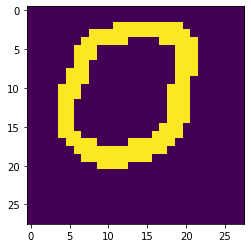

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 87
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

# train-test split of model 

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# fiting the model using svc and also saving the model using joblib

In [7]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

# calculating accuracy

In [9]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy = ",metrics.accuracy_score(prediction, test_y))

Accuracy =  1.0


# prediction of image drawn in paint

In [1]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
   img=ImageGrab.grab(bbox=(80,250,500,700))
   
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ## Add pixel one by one into data array
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.